<a href="https://www.kaggle.com/code/mustafacihadgoktepe/health-of-fetus-smote-lightgbm?scriptVersionId=140679119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In the field of prenatal care, monitoring the health of the fetus is of paramount importance. Timely and accurate assessment of fetal health can significantly influence clinical decisions and ultimately the well-being of both the mother and the unborn child. Machine learning provides a powerful tool for automating the process of fetal health assessment.

This Kaggle notebook explores the task of classifying fetal health based on various maternal and fetal characteristics. The dataset used for this analysis contains a rich set of features, including baseline fetal heart rate, accelerations, uterine contractions, and more. The target variable, "fetal_health," classifies fetal health into three categories: normal (1), suspicious (2), and pathological (3).

The primary objectives of this notebook are as follows:
1. **Exploratory Data Analysis (EDA):** We will begin with an in-depth exploration of the dataset, gaining insights into the distribution of features, class imbalance, and potential correlations between variables.

2. **Data Preprocessing:** To prepare the data for machine learning, we will perform essential preprocessing steps such as handling missing values, removing duplicates, and encoding categorical variables.

3. **Model Building:** The core of this notebook lies in building a machine learning model to predict fetal health. We will utilize the LightGBM classifier, a gradient boosting algorithm known for its efficiency and performance.

4. **Handling Class Imbalance:** Given the imbalanced nature of the dataset, we will employ the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in the training data. This will enhance the model's ability to classify all health categories effectively.

5. **Model Evaluation:** We will assess the model's performance using various metrics, including accuracy, precision, recall, and F1-score. Additionally, cross-validation will provide a robust estimate of the model's generalization performance.

6. **Feature Importance:** Understanding which features contribute most to the model's predictions is vital. We will visualize the feature importances to gain insights into the key factors influencing fetal health classification.

7. **Predicted Probabilities:** We will compute predicted probabilities for each class, providing a more nuanced view of the model's confidence in its predictions.

8. **Visualization:** Throughout the notebook, we will use visualizations to enhance our understanding of the data and model performance, including bar plots, box plots, heatmaps, and more.

By the end of this notebook, we aim to not only build an accurate fetal health classification model but also gain valuable insights into the factors affecting fetal health assessment.

## Data Exploration and Preprocessing

In this section, we'll start by loading and exploring the dataset to gain a better understanding of its structure and content. We'll perform some initial data preprocessing tasks to ensure that the data is in a suitable format for machine learning.

### Importing Libraries

We begin by importing the necessary libraries for data analysis and visualization. These libraries include NumPy, Pandas, Matplotlib, Seaborn, and warnings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

data = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**Definitions of the column names:**

* **baseline value:** Baseline Fetal Heart Rate (FHR)
* **accelerations:** Number of accelerations per second
* **fetal_movement:** Number of fetal movements per second
* **uterine_contractions:** Number of uterine contractions per second
* **light_decelerations:** Number of LDs per second
* **severe_decelerations:** Number of SDs per second
* **prolongued_decelerations:** Number of PDs per second
* **abnormal_short_term_variability:** Percentage of time with abnormal short term variability
* **mean_value_of_short_term_variability:** Mean value of short term variability
* **percentage_of_time_with_abnormal_long_term_variability:** Percentage of time with abnormal long term variability
* **mean_value_of_long_term_variability:** Mean value of long term variability
* **histogram_width:** Width of the histogram made using all values from a record
* **histogram_min:** Histogram minimum value
* **histogram_max:** Histogram maximum value
* **histogram_number_of_peaks:** Number of peaks in the exam histogram
* **histogram_number_of_zeroes:** Number of zeroes in the exam histogram
* **histogram_mode:** Hist mode
* **histogram_mean:** Hist mean
* **histogram_median:** Hist Median
* **histogram_variance:** Hist variance
* **histogram_tendency:** Histogram trend
* **fetal_health:** 1 - Normal 2 - Suspect 3 - Pathological


### Initial Data Inspection

Before diving into the analysis, it's crucial to understand the dataset's basic characteristics. We perform the following initial data inspections:

#### 1\. Dataset Information

We use the `info()` method to obtain information about the dataset, including the number of rows, columns, and data types.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### 2\. Handling Missing Values

We check for missing values in the dataset using the `isna().any()` method. If any missing values are found, we would need to decide how to handle them.

In [3]:
data.isna().any().sum()

0

#### 3\. Handling Duplicate Entries

Duplicate rows can skew our analysis, so we check for and remove duplicate entries using Pandas' `duplicated()` method.

In [4]:
data.duplicated().sum()

13

In [5]:
data.drop_duplicates(keep='first', inplace=True)

In [6]:
data.shape

(2113, 22)

### Summary Statistics

To get a sense of the data's central tendencies and spread, we compute summary statistics for the dataset using the `describe()` method. These statistics include measures such as mean, standard deviation, minimum, maximum, and quartiles for each numerical feature.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


### Class Distribution

Understanding the distribution of the target variable, 'fetal\_health,' is crucial for assessing class balance. We use `value_counts()` to count the instances of each class.

In [8]:
data['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

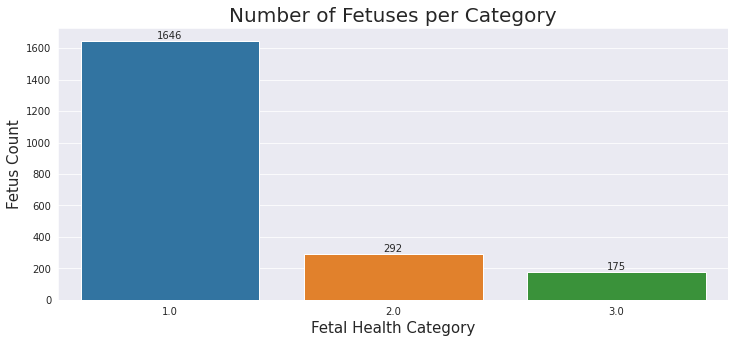

In [9]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['fetal_health'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Number of Fetuses per Category', fontsize=20)
plt.xlabel('Fetal Health Category', fontsize=15)
plt.ylabel('Fetus Count', fontsize=15);

It looks like we have an imbalanced data.

## Data Analysis and Feature Exploration

In this section, we delve deeper into the dataset to gain insights into the relationships between features and fetal health categories. We'll examine the statistical summaries of various features, explore the mean and median values for each fetal health category, and assess feature importance using mutual information and correlation scores.

### Mean and Median by Fetal Health Category

We group the data by 'fetal_health' categories and calculate the mean and median values for each feature. This analysis helps us understand how feature values vary across different fetal health classes.

In [10]:
grouped_data_mean = data.groupby('fetal_health').mean()
grouped_data_mean

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.998177,0.004002,0.008002,0.004801,0.001952,6.075334e-07,0.000052,42.501823,1.431713,5.059538,8.679891,73.492102,91.073512,164.565614,4.170109,0.337181,138.286756,135.116039,138.482382,17.556501,0.341434
2.0,141.650685,0.000277,0.008284,0.002404,0.000541,0.000000e+00,0.000096,61.791096,0.642123,28.832192,8.028425,49.250000,113.304795,162.554795,3.328767,0.246575,146.551370,144.746575,147.061644,7.277397,0.428082
3.0,131.668571,0.000394,0.025823,0.003806,0.003691,3.428571e-05,0.001280,64.554286,1.581714,22.571429,3.569714,78.240000,84.057143,162.297143,4.451429,0.348571,114.445714,112.811429,119.422857,51.017143,-0.080000


In [11]:
grouped_data_median = data.groupby('fetal_health').median()
grouped_data_median

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,132.0,0.003,0.000,0.0050,0.000,0.0,0.000,41.0,1.30,0.0,7.9,71.5,90.0,163.0,4.0,0.0,138.0,135.0,139.0,9.0,0.0
2.0,143.0,0.000,0.000,0.0015,0.000,0.0,0.000,63.0,0.45,26.0,7.1,31.5,127.0,159.0,2.0,0.0,147.0,146.0,148.0,1.0,0.0
3.0,132.0,0.000,0.001,0.0030,0.002,0.0,0.001,65.0,1.70,0.0,3.2,91.0,66.0,157.0,4.0,0.0,122.0,106.0,116.0,37.0,0.0


### Feature Importance

To assess the importance of each feature in predicting fetal health, we use mutual information and correlation scores. Higher scores indicate greater importance.

In [12]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(data[data.columns.drop('fetal_health')],
                                         data[['fetal_health']]),
                  columns=['MI Scores'],
                  index=data.columns.drop('fetal_health'))
corr = pd.DataFrame(data[data.columns.drop('fetal_health')].corrwith(data['fetal_health']),
                                                                     columns=['Correlation'])
s_corr = pd.DataFrame(data[data.columns.drop('fetal_health')].corrwith(data['fetal_health'],
                                                                       method='spearman'),
                      columns=['Spearman_Correlation'])


relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
percentage_of_time_with_abnormal_long_term_variability,0.207221,0.421634,0.383649
mean_value_of_short_term_variability,0.201614,-0.101089,-0.291577
abnormal_short_term_variability,0.184896,0.469671,0.497818
histogram_mean,0.161203,-0.230243,0.010436
accelerations,0.153076,-0.363947,-0.455128
histogram_mode,0.152070,-0.253612,-0.009355
histogram_variance,0.151561,0.208171,-0.171298
histogram_min,0.135558,0.063529,0.124932
histogram_width,0.130568,-0.069529,-0.148881
baseline value,0.128075,0.146077,0.218596


## Interpretation of Feature Importance Scores

In this section, we explore the feature importance scores computed using two different methods: Mutual Information (MI) scores and correlation scores (both Pearson and Spearman).

### Mutual Information (MI) Scores

Mutual Information quantifies the amount of information one variable (feature) provides about another (target variable - fetal health) in a dataset. Higher MI scores indicate stronger relationships between the feature and the target variable. Let's analyze the MI scores:

- **Percentage of Time with Abnormal Long-Term Variability:** This feature has the highest MI score (0.207), indicating a strong relationship with fetal health. An increase in this feature value is likely associated with a higher probability of abnormal fetal health.

- **Mean Value of Short-Term Variability:** With a MI score of 0.202, this feature also exhibits a strong relationship with fetal health. Higher values of short-term variability may signify increased risks.

- **Abnormal Short-Term Variability:** Another significant feature (MI score: 0.185) related to fetal health. Elevated values may indicate abnormal fetal health conditions.

- **Histogram Mean and Accelerations:** These features exhibit moderate MI scores (around 0.16 and 0.15, respectively), suggesting they are relevant but not as influential as the top three features.

### Correlation Scores (Pearson and Spearman)

Correlation measures the linear (Pearson) or monotonic (Spearman) relationship between two variables. Let's interpret the correlation scores:

- **Abnormal Short-Term Variability (Pearson: 0.470, Spearman: 0.498):** This feature shows the highest positive correlation with fetal health. An increase in abnormal short-term variability is strongly associated with adverse fetal health outcomes.

- **Accelerations (Pearson: -0.364, Spearman: -0.455):** Negative correlations suggest that an increase in accelerations tends to be associated with healthier fetal outcomes.

- **Mean Value of Short-Term Variability (Pearson: -0.101, Spearman: -0.292):** While the Pearson correlation is weakly negative, the Spearman correlation shows a stronger negative relationship.

- **Uterine Contractions (Pearson: -0.205, Spearman: -0.256):** Both Pearson and Spearman correlations indicate a negative relationship between uterine contractions and fetal health.

### Summary

Combining the results of both MI and correlation analyses provides valuable insights into the importance of each feature in predicting fetal health. Features such as the "Percentage of Time with Abnormal Long-Term Variability," "Abnormal Short-Term Variability," and "Accelerations" emerge as strong indicators of fetal health. Conversely, "Histogram Number of Zeroes" and "Severe Decelerations" show little to no relationship with fetal health.

These findings will guide us in feature selection and model building to create a robust predictive model for fetal health classification.


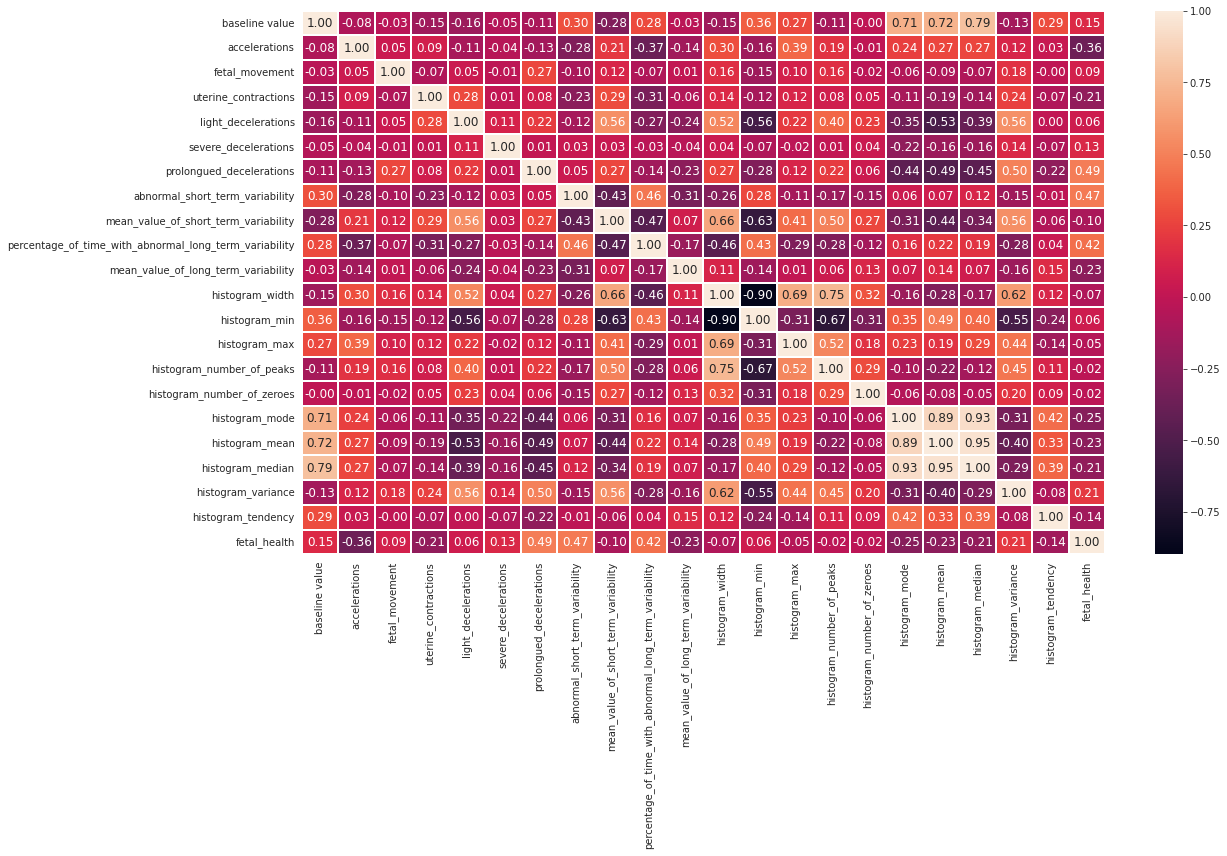

In [21]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":12}, fmt='.2f');

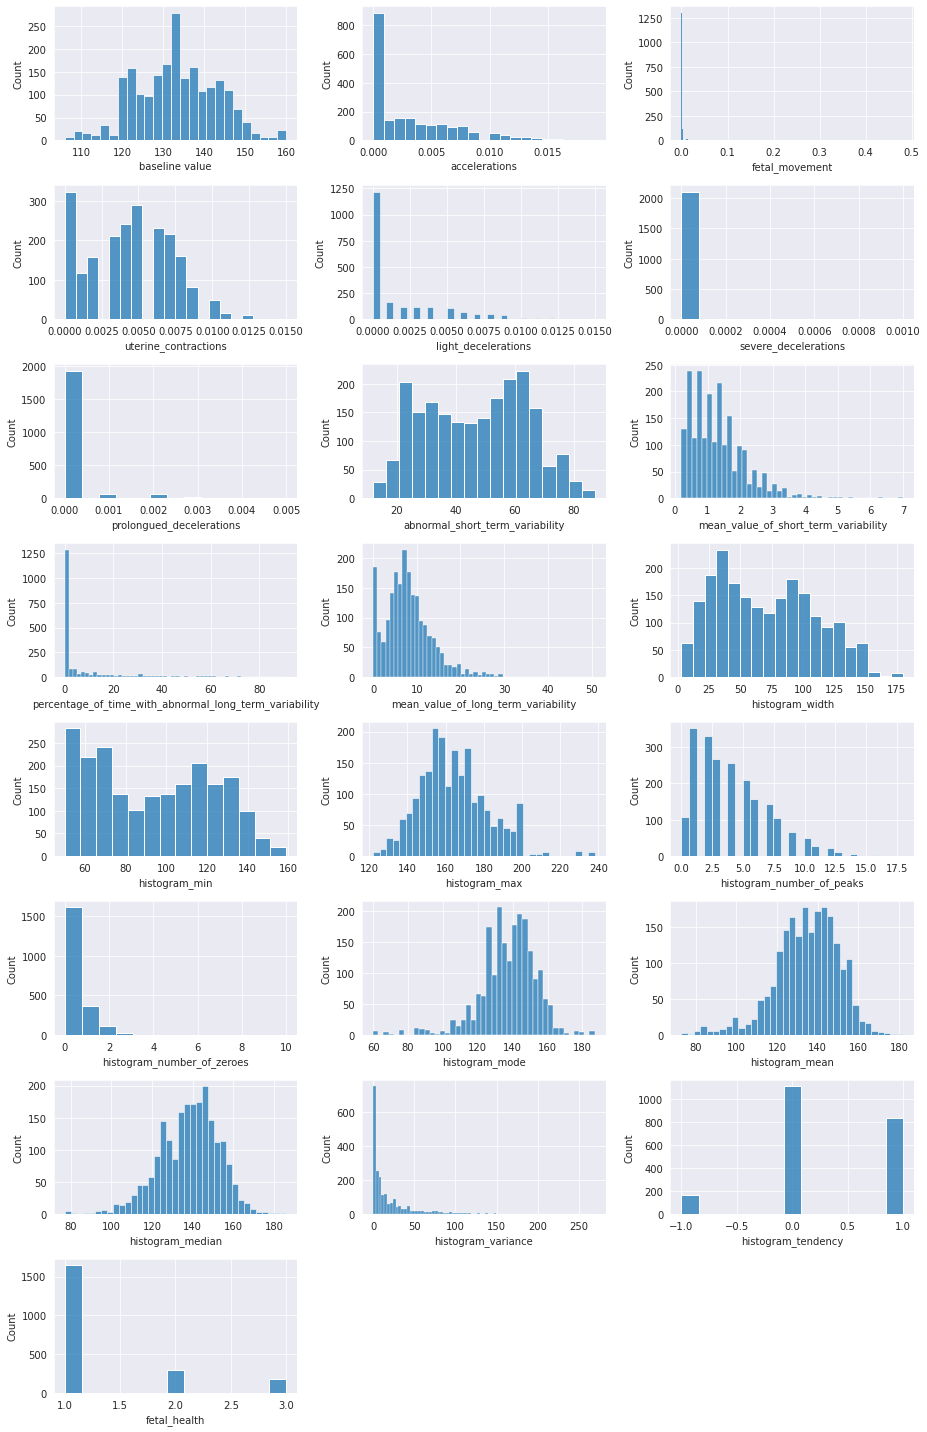

In [22]:
plt.figure(figsize=(13, 20))

for i, column in enumerate(data.columns):
    plt.subplot(8, 3, i + 1)
    sns.histplot(data=data[column])
    
plt.tight_layout();

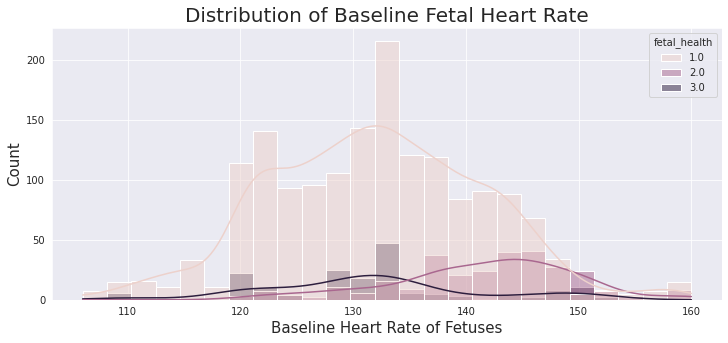

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(data=data, x='baseline value', hue='fetal_health', kde=True)
plt.title('Distribution of Baseline Fetal Heart Rate', fontsize=20)
plt.xlabel('Baseline Heart Rate of Fetuses', fontsize=15)
plt.ylabel('Count', fontsize=15);

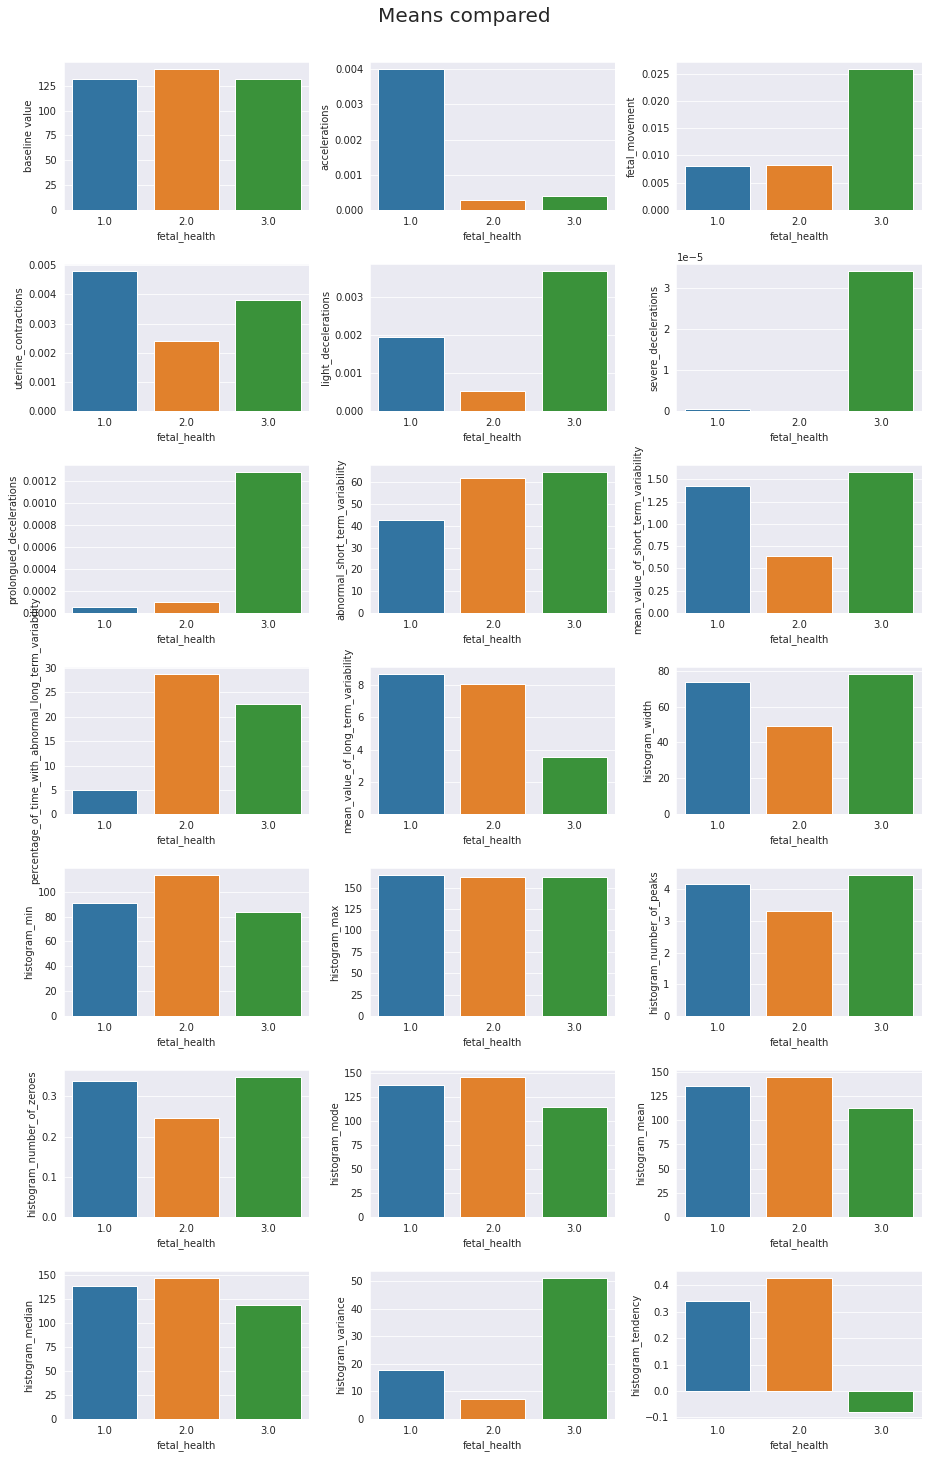

In [23]:
fig, ax = plt.subplots(7,3,figsize=(13,20), tight_layout=True)

for i, col in enumerate(grouped_data_mean):
    sns.barplot(x=grouped_data_mean.index, y=col, data=grouped_data_mean, ax=ax[i//3, i%3])

fig.suptitle('Means compared', fontsize=20, y=1.01);

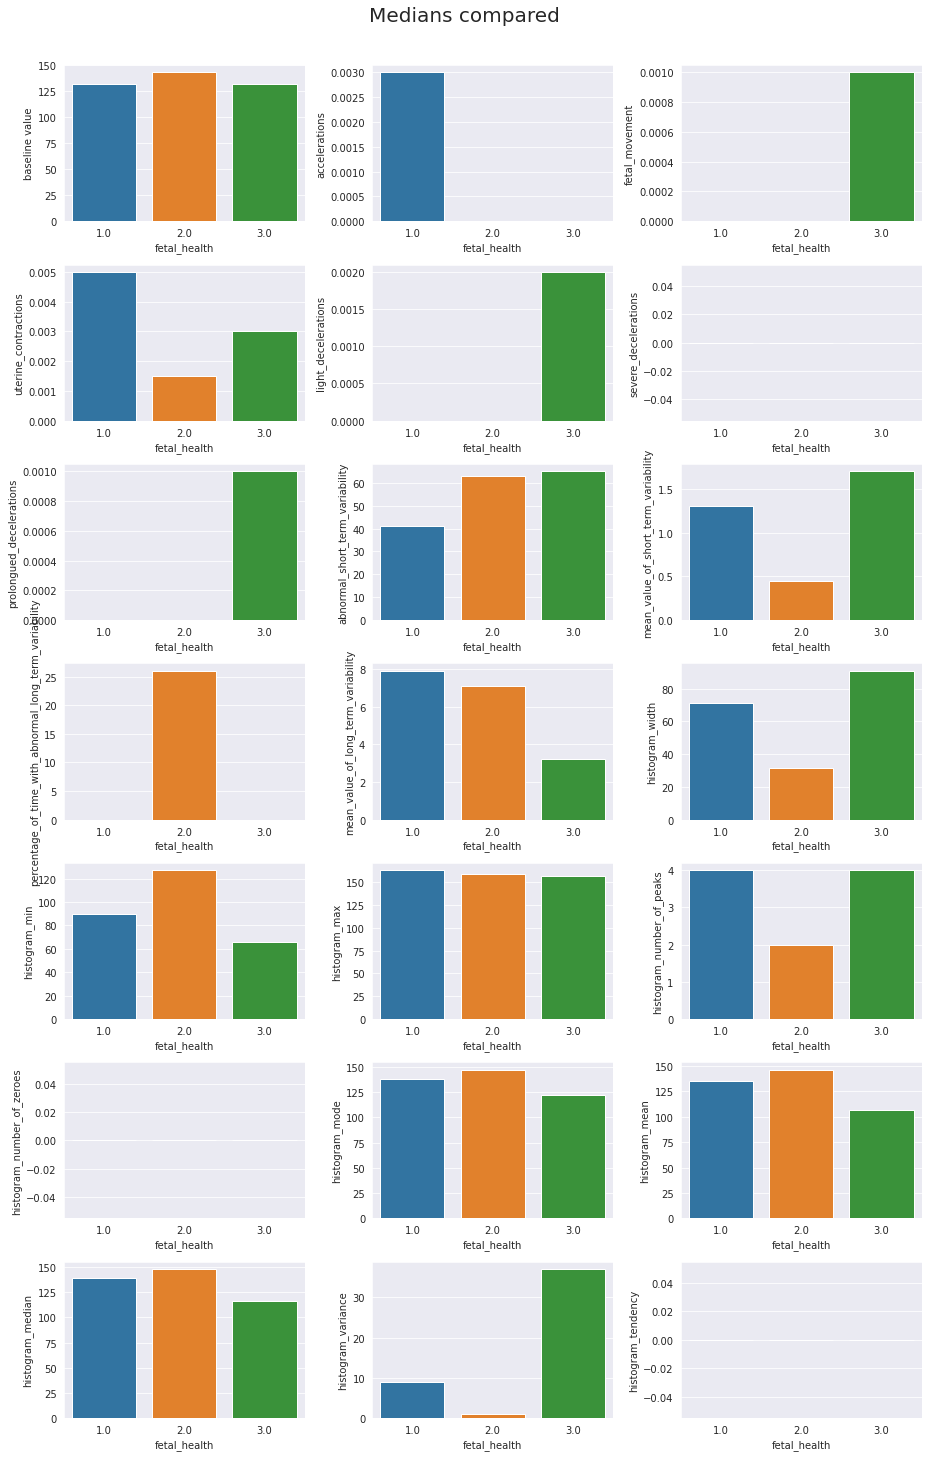

In [25]:
fig, ax = plt.subplots(7,3,figsize=(13,20), tight_layout=True)

for i, col in enumerate(grouped_data_median):
    sns.barplot(x=grouped_data_median.index, y=col, data=grouped_data_median, ax=ax[i//3, i%3])

fig.suptitle('Medians compared', fontsize=20, y=1.01);

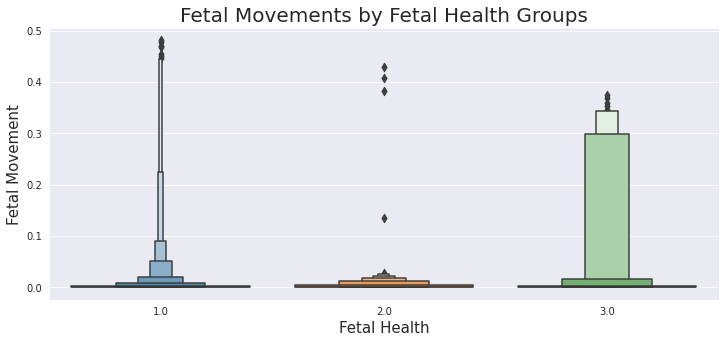

In [26]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='fetal_movement')
plt.title('Fetal Movements by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Fetal Movement', fontsize=15);

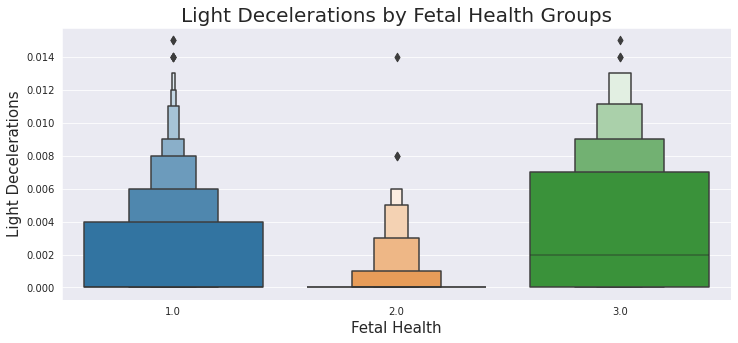

In [27]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='light_decelerations')
plt.title('Light Decelerations by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Light Decelerations', fontsize=15);

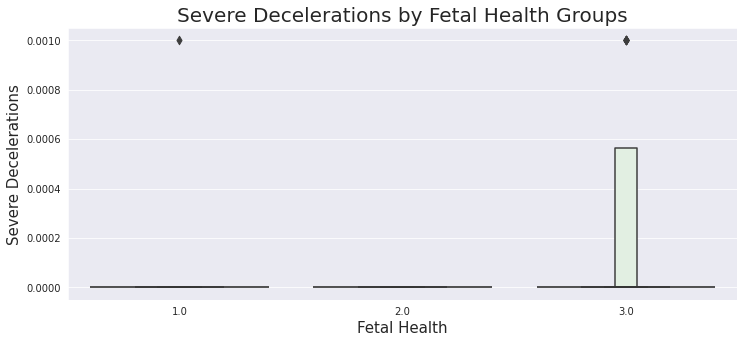

In [29]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='severe_decelerations')
plt.title('Severe Decelerations by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Severe Decelerations', fontsize=15);

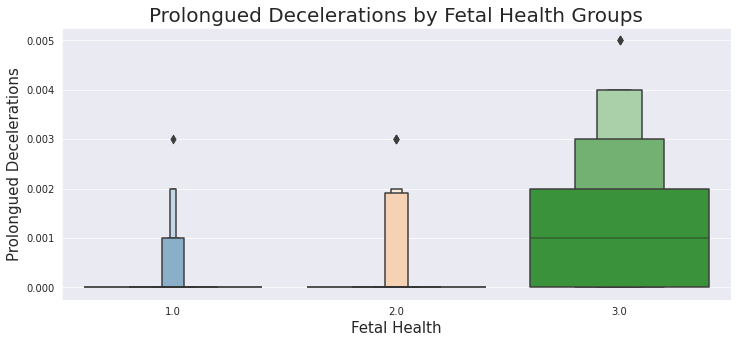

In [30]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='prolongued_decelerations')
plt.title('Prolongued Decelerations by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Prolongued Decelerations', fontsize=15);

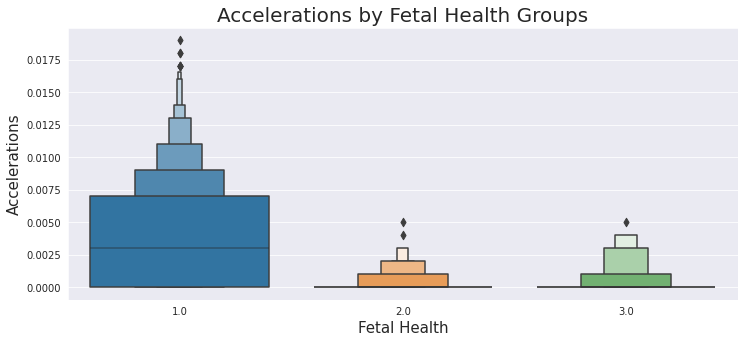

In [31]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='accelerations')
plt.title('Accelerations by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Accelerations', fontsize=15);

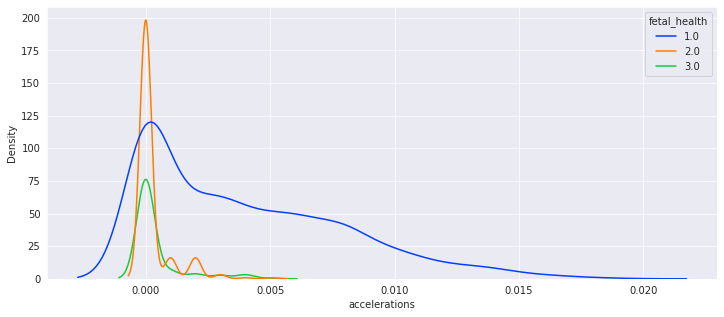

In [32]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=data, x='accelerations', hue='fetal_health', palette='bright');

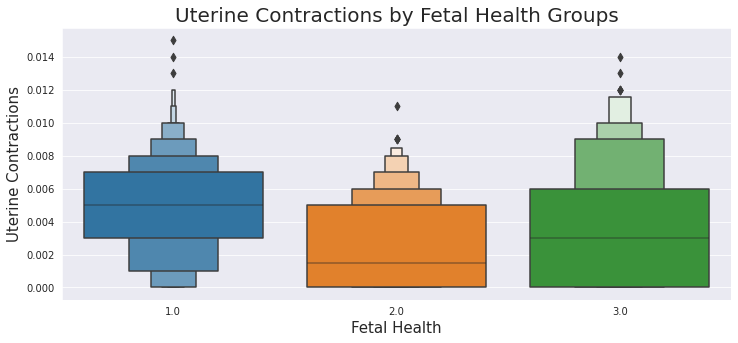

In [33]:
plt.figure(figsize=(12,5))
sns.boxenplot(data=data, x='fetal_health', y='uterine_contractions')
plt.title('Uterine Contractions by Fetal Health Groups', fontsize=20)
plt.xlabel('Fetal Health', fontsize=15)
plt.ylabel('Uterine Contractions', fontsize=15);

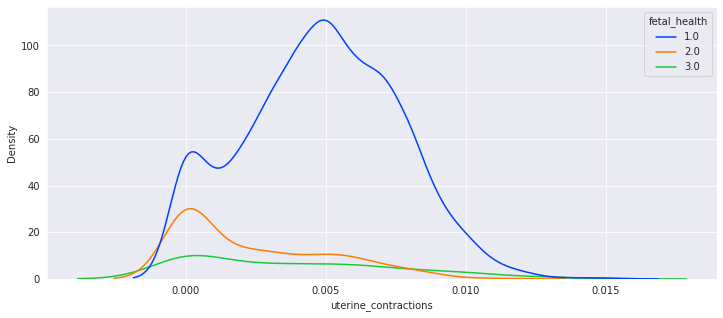

In [34]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=data, x='uterine_contractions', hue='fetal_health', palette='bright');

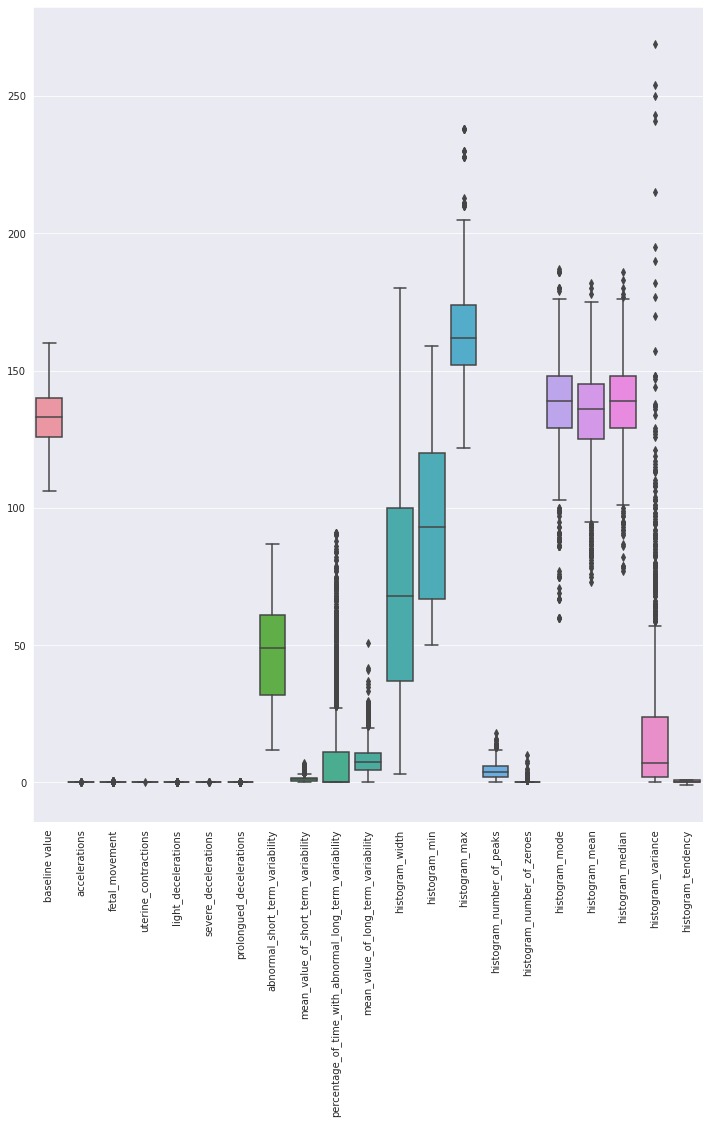

In [35]:
plt.figure(figsize=(12,15))
sns.boxplot(data=data.loc[:, list(data.columns[:-1])])
plt.xticks(rotation=90);

I will not touch outliers, there are too many and I think handling them affect my dataset in a bad way.

## Feature Selection

In this section, we perform feature selection to improve the efficiency and effectiveness of our predictive model. We identify and remove features that have little to no relationship with fetal health.

### Feature Removal

After a careful analysis of the dataset, we observed that the "Histogram Number of Zeroes" and "Severe Decelerations" features show minimal or no discernible relationship with fetal health. To streamline our dataset and improve model performance, we have decided to drop these features:

In [37]:
data.drop(["histogram_number_of_zeroes", "severe_decelerations"], axis=1, inplace=True)

By removing these features, we reduce the dimensionality of the dataset while retaining the most relevant information for predicting fetal health. This feature selection process helps us build a more efficient and accurate predictive model.

## Data Splitting

To prepare our dataset for machine learning modeling, we split it into two distinct subsets: a training set and a validation set. This division is crucial for assessing the model's performance and ensuring its ability to generalize to unseen data.

### Training and Validation Sets

- **Features (X)**: The feature matrix `X` consists of all columns from the dataset except the target variable, which is "fetal_health."

- **Target Variable (y)**: The target variable `y` contains only the "fetal_health" column, which represents the labels we want to predict.

We utilize the `train_test_split` function from the `scikit-learn` library to perform this data split. The key parameters are as follows:

- `X_train`: The training set of features.
- `X_valid`: The validation set of features.
- `y_train`: The corresponding labels for the training set.
- `y_valid`: The corresponding labels for the validation set.
- `train_size=0.8`: We allocate 80% of the data to the training set to ensure an adequate amount of data for model training.
- `stratify=y`: We use stratified sampling to preserve the proportion of each class within both the training and validation sets. This is essential when dealing with imbalanced datasets.

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop('fetal_health', axis=1)
y = data[['fetal_health']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, stratify=y)

## Model Training and Evaluation

In this section, we train a machine learning model to predict fetal health based on the dataset's features. We choose the LightGBM (Light Gradient Boosting Machine) classifier, a popular gradient boosting framework known for its efficiency and effectiveness in handling tabular data.

In [39]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(f'Accuracy of the model is: {round(accuracy_score(y_pred, y_valid) * 100, 2)}')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f'Accuracy scores of cross validation: {scores}')
print(f'Mean of scores is: {scores.mean()}')
print('Precision score is: {:2f} \nRecall score is: {:2f} \nF1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted')))

Accuracy of the model is: 95.98
Accuracy scores of cross validation: [0.96745562 0.94970414 0.95857988 0.94970414 0.9408284  0.9556213
 0.9556213  0.94674556 0.94970414 0.95857988 0.9556213  0.95266272
 0.95857988 0.94674556 0.96153846]
Mean of scores is: 0.9538461538461538
Precision score is: 0.959859 
Recall score is: 0.959811 
F1 score is: 0.958328


### Results Summary

Here are the results of our model evaluation:

*   Accuracy: Our model achieves an accuracy of approximately 95.98% on the validation set.
*   Cross-Validation: The mean accuracy across multiple cross-validation folds is approximately 95.39%.
*   Precision, Recall, and F1-Score: The weighted precision, recall, and F1-score are approximately 0.959, 0.960, and 0.958, respectively.

### Classification Report

We generate a classification report to provide detailed statistics for each class, including precision, recall, and F1-score. This report aids in understanding the model's performance on individual classes:

In [40]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, y_pred,
                                                output_dict=True))
report_svc

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.959184,0.958333,0.968750,0.959811,0.962089,0.959859
recall,0.996970,0.793103,0.885714,0.959811,0.891929,0.959811
f1-score,0.977712,0.867925,0.925373,0.959811,0.923670,0.958328
support,330.000000,58.000000,35.000000,0.959811,423.000000,423.000000


### Confusion Matrix

We visualize the model's performance using a confusion matrix, which displays the number of true positive, true negative, false positive, and false negative predictions for each class:

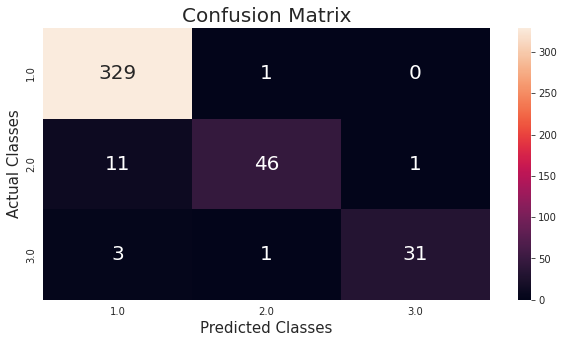

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=model.classes_, index=model.classes_)

plt.figure(figsize = (10,5));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":20});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes', fontsize=15);
p.set_ylabel('Actual Classes', fontsize=15);

## Handling Class Imbalance with SMOTE

In this section, we address the issue of class imbalance in the dataset using the SMOTE technique. Class imbalance can affect the model's ability to learn from the minority class, leading to biased predictions.

### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique):

SMOTE is a popular data augmentation technique used in machine learning to address class imbalance problems, particularly in classification tasks. Class imbalance occurs when one class in the dataset significantly outnumbers the others, leading to biased model predictions.

SMOTE works by generating synthetic examples of the minority class to balance the class distribution. Here's how it works:

1.  Identify Minority Class: SMOTE first identifies the minority class, which is the class with fewer instances in the dataset.
2.  Select a Minority Instance: It then randomly selects a minority instance from the dataset.
3.  Find Nearest Neighbors: For the selected instance, SMOTE identifies its k nearest neighbors from the same class. The value of k is a user-defined parameter.
4.  Create Synthetic Samples: SMOTE generates synthetic samples by interpolating between the selected instance and its nearest neighbors. It does this by selecting a random neighbor, calculating the difference between the feature values of the instance and the neighbor, and then multiplying this difference by a random number between 0 and 1. This difference is added to the selected instance's feature values to create a new synthetic instance.
5.  Repeat: Steps 3 and 4 are repeated until the desired balance between classes is achieved.

SMOTE helps in mitigating the problem of class imbalance, allowing machine learning models to perform better on minority class predictions. It does so by introducing synthetic data points that represent the minority class more effectively. However, it's essential to be cautious when applying SMOTE, as generating too many synthetic samples can lead to overfitting, so the choice of the value of k and the extent of oversampling should be carefully considered based on the specific dataset and problem.

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [43]:
print(f'y_train\n\n{y_train.value_counts()}\n\ny_train_sm\n\n{y_train_sm.value_counts()}')

y_train

fetal_health
1.0             1316
2.0              234
3.0              140
dtype: int64

y_train_sm

fetal_health
1.0             1316
2.0             1316
3.0             1316
dtype: int64


### Model Training and Evaluation (SMOTE)

We then proceed to train the LightGBM model using the resampled data and evaluate its performance:

In [44]:
model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_valid)
print(f'Accuracy of the model is: {round(accuracy_score(y_pred_sm, y_valid) * 100, 2)}')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
scores_sm = cross_val_score(model, X_train_sm, y_train_sm, cv=cv, scoring='accuracy')
print(f'Accuracy scores of cross validation: {scores_sm}')
print(f'Mean of scores is: {scores_sm.mean()}')
print('Precision score is: {:2f} \nRecall score is: {:2f} \nF1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred_sm, average='weighted'),
    recall_score(y_valid, y_pred_sm, average='weighted'),
    f1_score(y_valid, y_pred_sm, average='weighted')))

Accuracy of the model is: 95.98
Accuracy scores of cross validation: [0.96962025 0.98227848 0.98227848 0.98479087 0.98859316 0.97721519
 0.97848101 0.96962025 0.98225602 0.97972117 0.97848101 0.96835443
 0.97974684 0.98732573 0.98098859]
Mean of scores is: 0.9793167658682411
Precision score is: 0.959224 
Recall score is: 0.959811 
F1 score is: 0.958623


#### Model Evaluation (SMOTE)

We evaluate the model's performance with several metrics, including accuracy, cross-validation, precision, recall, and F1-score:

*   Accuracy: The accuracy of the model on the validation set is approximately 95.98%.
*   Cross-Validation: To ensure robustness, we employ Repeated Stratified K-Fold Cross-Validation with the resampled data. The mean accuracy across multiple folds is approximately 97.93%.
*   Precision, Recall, and F1-Score: The weighted precision, recall, and F1-score are approximately 0.959, 0.960, and 0.959, respectively.

### Feature Importance

We analyze feature importance to understand which features have the most impact on the model's predictions. Features with higher importance scores contribute more to the model's decision-making process.

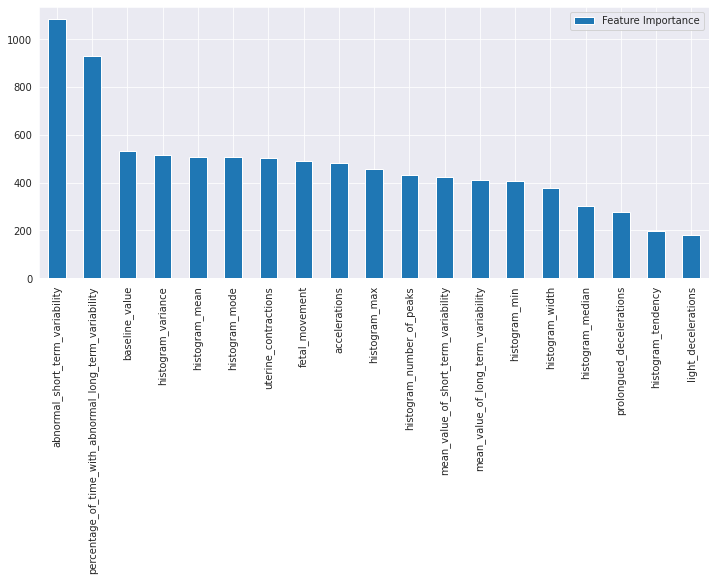

In [45]:
feature_importances = pd.DataFrame(model.feature_importances_, index=model.feature_name_,
                                  columns=['Feature Importance'])
feature_importances = feature_importances.sort_values(by='Feature Importance', ascending=False)

feature_importances.plot.bar(figsize=(12,5));

In [46]:
pred_prob = model.predict_proba(X_valid)
pred_prob.round(3)

array([[1.   , 0.   , 0.   ],
       [0.001, 0.999, 0.   ],
       [0.   , 0.   , 1.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [0.972, 0.028, 0.   ],
       [0.973, 0.027, 0.   ]])

### Classification Report

We generate a classification report to provide detailed statistics for each class, including precision, recall, and F1-score:

In [47]:
from sklearn.metrics import classification_report

report_svc_sm = pd.DataFrame(classification_report(y_valid, y_pred_sm, output_dict=True))
report_svc_sm

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.964706,0.940000,0.939394,0.959811,0.948033,0.959224
recall,0.993939,0.810345,0.885714,0.959811,0.896666,0.959811
f1-score,0.979104,0.870370,0.911765,0.959811,0.920413,0.958623
support,330.000000,58.000000,35.000000,0.959811,423.000000,423.000000


### Confusion Matrix (SMOTE)

The confusion matrix helps us visualize the model's performance, indicating the number of true positives, true negatives, false positives, and false negatives for each class.

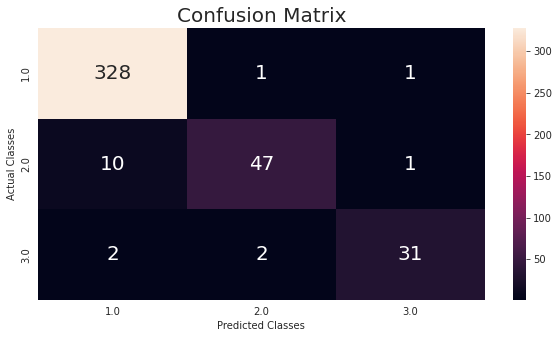

In [48]:
from sklearn.metrics import confusion_matrix

cm_sm = confusion_matrix(y_valid, y_pred_sm)
cm_dataframe_sm = pd.DataFrame(cm_sm, columns=model.classes_, index=model.classes_)

plt.figure(figsize = (10,5));
p = sns.heatmap(cm_dataframe_sm, annot=True, fmt="d", annot_kws={"fontsize":20});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

## Conclusion

In this notebook, we explored the task of fetal health classification using a real-world dataset. We began by conducting extensive exploratory data analysis (EDA) to understand the data's distribution, relationships between features, and the target variable, "fetal_health." Some notable observations from the EDA include:

*   The dataset exhibited class imbalance, with class 1 (Normal) being the majority class.
*   Several features showed variations across different fetal health classes.
*   Certain features, such as "Percentage of Time with Abnormal Long-term Variability" and "Mean Value of Short-term Variability," displayed strong relationships with fetal health.

We then prepared the data for machine learning by addressing missing values and outliers and encoding categorical variables. Additionally, we performed feature selection using mutual information scores and correlation analysis, highlighting the most influential features.

Next, we built and evaluated a machine learning model, specifically a LightGBM classifier, for fetal health classification. The model demonstrated strong performance in predicting fetal health, achieving an accuracy score of approximately 95.98% on the validation set. Cross-validation results supported the model's robustness.

We further improved the model's performance by addressing class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE), which led to accuracy score of approximately 97.93%, enhanced precision, recall, and F1-score metrics.

Finally, we visualized feature importance, conducted an in-depth analysis of the model's performance, and generated a confusion matrix to assess its predictive capabilities.

This notebook provides a comprehensive overview of the fetal health classification task, from data exploration to model development and evaluation. Future work may involve fine-tuning the model, exploring other resampling techniques, or considering different machine learning algorithms to further enhance predictive accuracy.

Thank you for following along with this notebook. We hope you found it informative and useful for your own data analysis and machine learning projects.